In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
import pandas as pd
# Carregar o arquivo CSV como um DataFrame pandas
df = pd.read_csv(r'C:\Users\cqueiroz\OneDrive - Capgemini\Documents\2. docsCamila\repos2\3_tech_challenge_big_data_fiap\bases\base_tratada_pnad.csv')
df.head()


C:\Users\cqueiroz\AppData\Local\Temp\ipykernel_6760\3800145276.py:3: DtypeWarning: Columns (5,25,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\cqueiroz\OneDrive - Capgemini\Documents\2. docsCamila\repos2\3_tech_challenge_big_data_fiap\bases\base_tratada_pnad.csv')


,ANOMES,ANO_PESQUISA,MES_PESQUISA,SEMANA_MES,UF,CAPITAL,REGIAO_METROPOLITANA,SITU_DOMICILIO,TIPO_AREA,IDADE_MORADOR,...,SE_TEVE_PERDA_PALADAR,SE_TEVE_DOR_MUSCULAR,SE_TEVE_DIARREIA,FOI_AO_MEDICO,FOI_SEDADO_ENTUBADO,TEM_PLANO_SAUDE,QUAL_RESULTADO,MEDIDA_RESTRICAO,TRABALHO_REMOTO,AUXILIO_EMERGENCIAL_COVID
0,202007,2020,7,3,Santa Catarina,NaN,NaN,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",33,...,Não,Não,Não,Não aplicável,Não aplicável,Não,Não aplicável,Ignorado,Não aplicável,Não
1,202007,2020,7,3,Santa Catarina,NaN,NaN,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",70,...,Ignorado,Ignorado,Ignorado,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Não
2,202007,2020,7,2,Espírito Santo,NaN,NaN,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",63,...,Não,Não,Não,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Sim
3,202007,2020,7,3,Minas Gerais,NaN,NaN,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",82,...,Ignorado,Ignorado,Ignorado,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Não
4,202007,2020,7,4,Ceará,NaN,NaN,Urbana,"Resto da UF (Unidade da Federação, excluindo ...",12,...,Ignorado,Ignorado,Ignorado,Não aplicável,Não aplicável,Ignorado,Não aplicável,Ignorado,Não aplicável,Sim


In [3]:
# Substituir valores nulos nas colunas CAPITAL e REGIAO_METROPOLITANA por "Não Informado"
df['CAPITAL'].fillna('Não Informado', inplace=True)
df['REGIAO_METROPOLITANA'].fillna('Não Informado', inplace=True)

# Substituir valores nulos nas colunas MEDIDA_RESTRICAO e SE_TEVE_DIARREIA por "Ignorado"
df['MEDIDA_RESTRICAO'].fillna('Ignorado', inplace=True)
df['SE_TEVE_DIARREIA'].fillna('Ignorado', inplace=True)

In [4]:
# Dicionário de mapeamento de estados para regiões
mapeamento_regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

# Função para mapear estados para regiões
def mapear_regiao(uf):
    for regiao, estados in mapeamento_regioes.items():
        if uf in estados:
            return regiao
    return 'Região não especificada'  # Para casos em que a coluna UF está vazia ou não especificada

# Criar coluna 'REGIAO' usando a função de mapeamento
df['REGIAO'] = df['UF'].apply(mapear_regiao)

In [5]:
# Definir as faixas etárias
faixas_etarias = [0, 12, 17, 35, 59, 150]  # Faixas etárias para criança, adolescente, jovem, adulto e idoso
labels_faixas_etarias = ['Criança', 'Adolescente', 'Jovem', 'Adulto', 'Idoso']

# Criar a coluna de faixa etária usando a função pd.cut()
df['FAIXA_ETARIA'] = pd.cut(df['IDADE_MORADOR'], bins=faixas_etarias, labels=labels_faixas_etarias, right=False)

# Agora você tem uma nova coluna 'FAIXA_ETARIA' no DataFrame 'dados'


In [6]:
df_cluster = df.copy()
# Descartar colunas unificadas em regiões
df_cluster.drop(['UF', 'CAPITAL', 'REGIAO_METROPOLITANA', 'TIPO_AREA', 'ANOMES','IDADE_MORADOR'], axis=1, inplace=True)

In [7]:
import pandas as pd

binary_columns = ['SE_TEVE_FEBRE', 'SE_TEVE_TOSSE', 'SE_TEVE_DOR_GARGANTA', 'SE_TEVE_FALTA_AR',
                  'SE_TEVE_DOR_CABECA', 'SE_TEVE_DOR_PEITO', 'SE_TEVE_NAUSEA', 'SE_TEVE_NARIZ_ENTUPIDO',
                  'SE_TEVE_FADIGA', 'SE_TEVE_DOR_OLHOS', 'SE_TEVE_PERDA_PALADAR', 'SE_TEVE_DOR_MUSCULAR',
                  'SE_TEVE_DIARREIA', 'FOI_AO_MEDICO', 'FOI_SEDADO_ENTUBADO', 'TEM_PLANO_SAUDE',
                  'AUXILIO_EMERGENCIAL_COVID', 'TRABALHO_REMOTO']

for col in binary_columns:
    df_cluster[col] = df_cluster[col].apply(lambda x: 1 if x == 'Sim' else 0)

# Mapear 'Sim' para 1 e outros valores para 0 em QUAL_RESULTADO
df_cluster['QUAL_RESULTADO'] = df_cluster['QUAL_RESULTADO'].apply(lambda x: 1 if x == 'Positivo' else 0)

# Criar colunas para classes de restrição em MEDIDA_RESTRICAO
# 1 - Ficou rigorosamente em casa
# 2 - Ficou em casa e só saiu em caso de necessidade básica
# 3 - Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas
# 0 - Não fez restrição / Ignorado
df_cluster['restricao_classe_1'] = df_cluster['MEDIDA_RESTRICAO'].apply(lambda x: 1 if x == 'Ficou rigorosamente em casa' else 0)
df_cluster['restricao_classe_2'] = df_cluster['MEDIDA_RESTRICAO'].apply(lambda x: 1 if x == 'Ficou em casa e só saiu em caso de necessidade básica' else 0)
df_cluster['restricao_classe_3'] = df_cluster['MEDIDA_RESTRICAO'].apply(lambda x: 1 if x == 'Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas' else 0)
df_cluster['sem_restricao'] = df_cluster['MEDIDA_RESTRICAO'].apply(lambda x: 1 if x in ['Não fez restrição', 'Ignorado'] else 0)


# Aplicar one-hot encoding nas colunas categóricas
categorical_columns = ['FAIXA_ETARIA', 'REGIAO', 'SEXO', 'ESCOLARIDADE', 'COR_RACA', 'SITU_DOMICILIO']
df_cluster = pd.get_dummies(df_cluster, columns=categorical_columns)

# Excluir as colunas ANO_PESQUISA, MES_PESQUISA e SEMANA_MES
df_cluster.drop(['ANO_PESQUISA', 'MES_PESQUISA', 'SEMANA_MES','MEDIDA_RESTRICAO'], axis=1, inplace=True)

# Exibir as primeiras linhas do DataFrame transformado
print(df_cluster.head())


   SE_TEVE_FEBRE  SE_TEVE_TOSSE  SE_TEVE_DOR_GARGANTA  SE_TEVE_FALTA_AR  \
0              0              0                     0                 0   
1              0              0                     0                 0   
2              0              0                     0                 0   
3              0              0                     0                 0   
4              0              0                     0                 0   

   SE_TEVE_DOR_CABECA  SE_TEVE_DOR_PEITO  SE_TEVE_NAUSEA  \
0                   0                  0               0   
1                   0                  0               0   
2                   0                  0               0   
3                   0                  0               0   
4                   0                  0               0   

   SE_TEVE_NARIZ_ENTUPIDO  SE_TEVE_FADIGA  SE_TEVE_DOR_OLHOS  ...  \
0                       0               0                  0  ...   
1                       0               0         

In [8]:
df_cluster = df_cluster.astype(int)

In [9]:
df_cluster


,SE_TEVE_FEBRE,SE_TEVE_TOSSE,SE_TEVE_DOR_GARGANTA,SE_TEVE_FALTA_AR,SE_TEVE_DOR_CABECA,SE_TEVE_DOR_PEITO,SE_TEVE_NAUSEA,SE_TEVE_NARIZ_ENTUPIDO,SE_TEVE_FADIGA,SE_TEVE_DOR_OLHOS,...,ESCOLARIDADE_Superior completo,ESCOLARIDADE_Superior incompleto,COR_RACA_Amarela,COR_RACA_Branca,COR_RACA_Ignorado,COR_RACA_Indígena,COR_RACA_Parda,COR_RACA_Preta,SITU_DOMICILIO_Rural,SITU_DOMICILIO_Urbana
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
920684,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
920685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
920686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [10]:
df_cluster.describe()

,SE_TEVE_FEBRE,SE_TEVE_TOSSE,SE_TEVE_DOR_GARGANTA,SE_TEVE_FALTA_AR,SE_TEVE_DOR_CABECA,SE_TEVE_DOR_PEITO,SE_TEVE_NAUSEA,SE_TEVE_NARIZ_ENTUPIDO,SE_TEVE_FADIGA,SE_TEVE_DOR_OLHOS,...,ESCOLARIDADE_Superior completo,ESCOLARIDADE_Superior incompleto,COR_RACA_Amarela,COR_RACA_Branca,COR_RACA_Ignorado,COR_RACA_Indígena,COR_RACA_Parda,COR_RACA_Preta,SITU_DOMICILIO_Rural,SITU_DOMICILIO_Urbana
count,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000,...,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000,920688.000000
mean,0.022595,0.032074,0.024714,0.012870,0.046559,0.010444,0.010077,0.035337,0.016357,0.012163,...,0.104789,0.058496,0.007615,0.414465,0.000354,0.004618,0.478288,0.094660,0.223735,0.776265
std,0.148609,0.176196,0.155253,0.112712,0.210692,0.101663,0.099878,0.184629,0.126846,0.109612,...,0.306282,0.234680,0.086931,0.492630,0.018814,0.067801,0.499529,0.292744,0.416747,0.416747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
from sklearn.cluster import KMeans

# Inicializar o modelo KMeans com 5 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Treinar o modelo com os dados
kmeans.fit(df_cluster)

# Obter os rótulos dos clusters para cada amostra
labels = kmeans.labels_

# Adicionar os rótulos dos clusters ao DataFrame original
df_cluster['Cluster'] = labels

# Visualizar os resultados
print(df_cluster.head())

   SE_TEVE_FEBRE  SE_TEVE_TOSSE  SE_TEVE_DOR_GARGANTA  SE_TEVE_FALTA_AR  \
0              0              0                     0                 0   
1              0              0                     0                 0   
2              0              0                     0                 0   
3              0              0                     0                 0   
4              0              0                     0                 0   

   SE_TEVE_DOR_CABECA  SE_TEVE_DOR_PEITO  SE_TEVE_NAUSEA  \
0                   0                  0               0   
1                   0                  0               0   
2                   0                  0               0   
3                   0                  0               0   
4                   0                  0               0   

   SE_TEVE_NARIZ_ENTUPIDO  SE_TEVE_FADIGA  SE_TEVE_DOR_OLHOS  ...  \
0                       0               0                  0  ...   
1                       0               0         

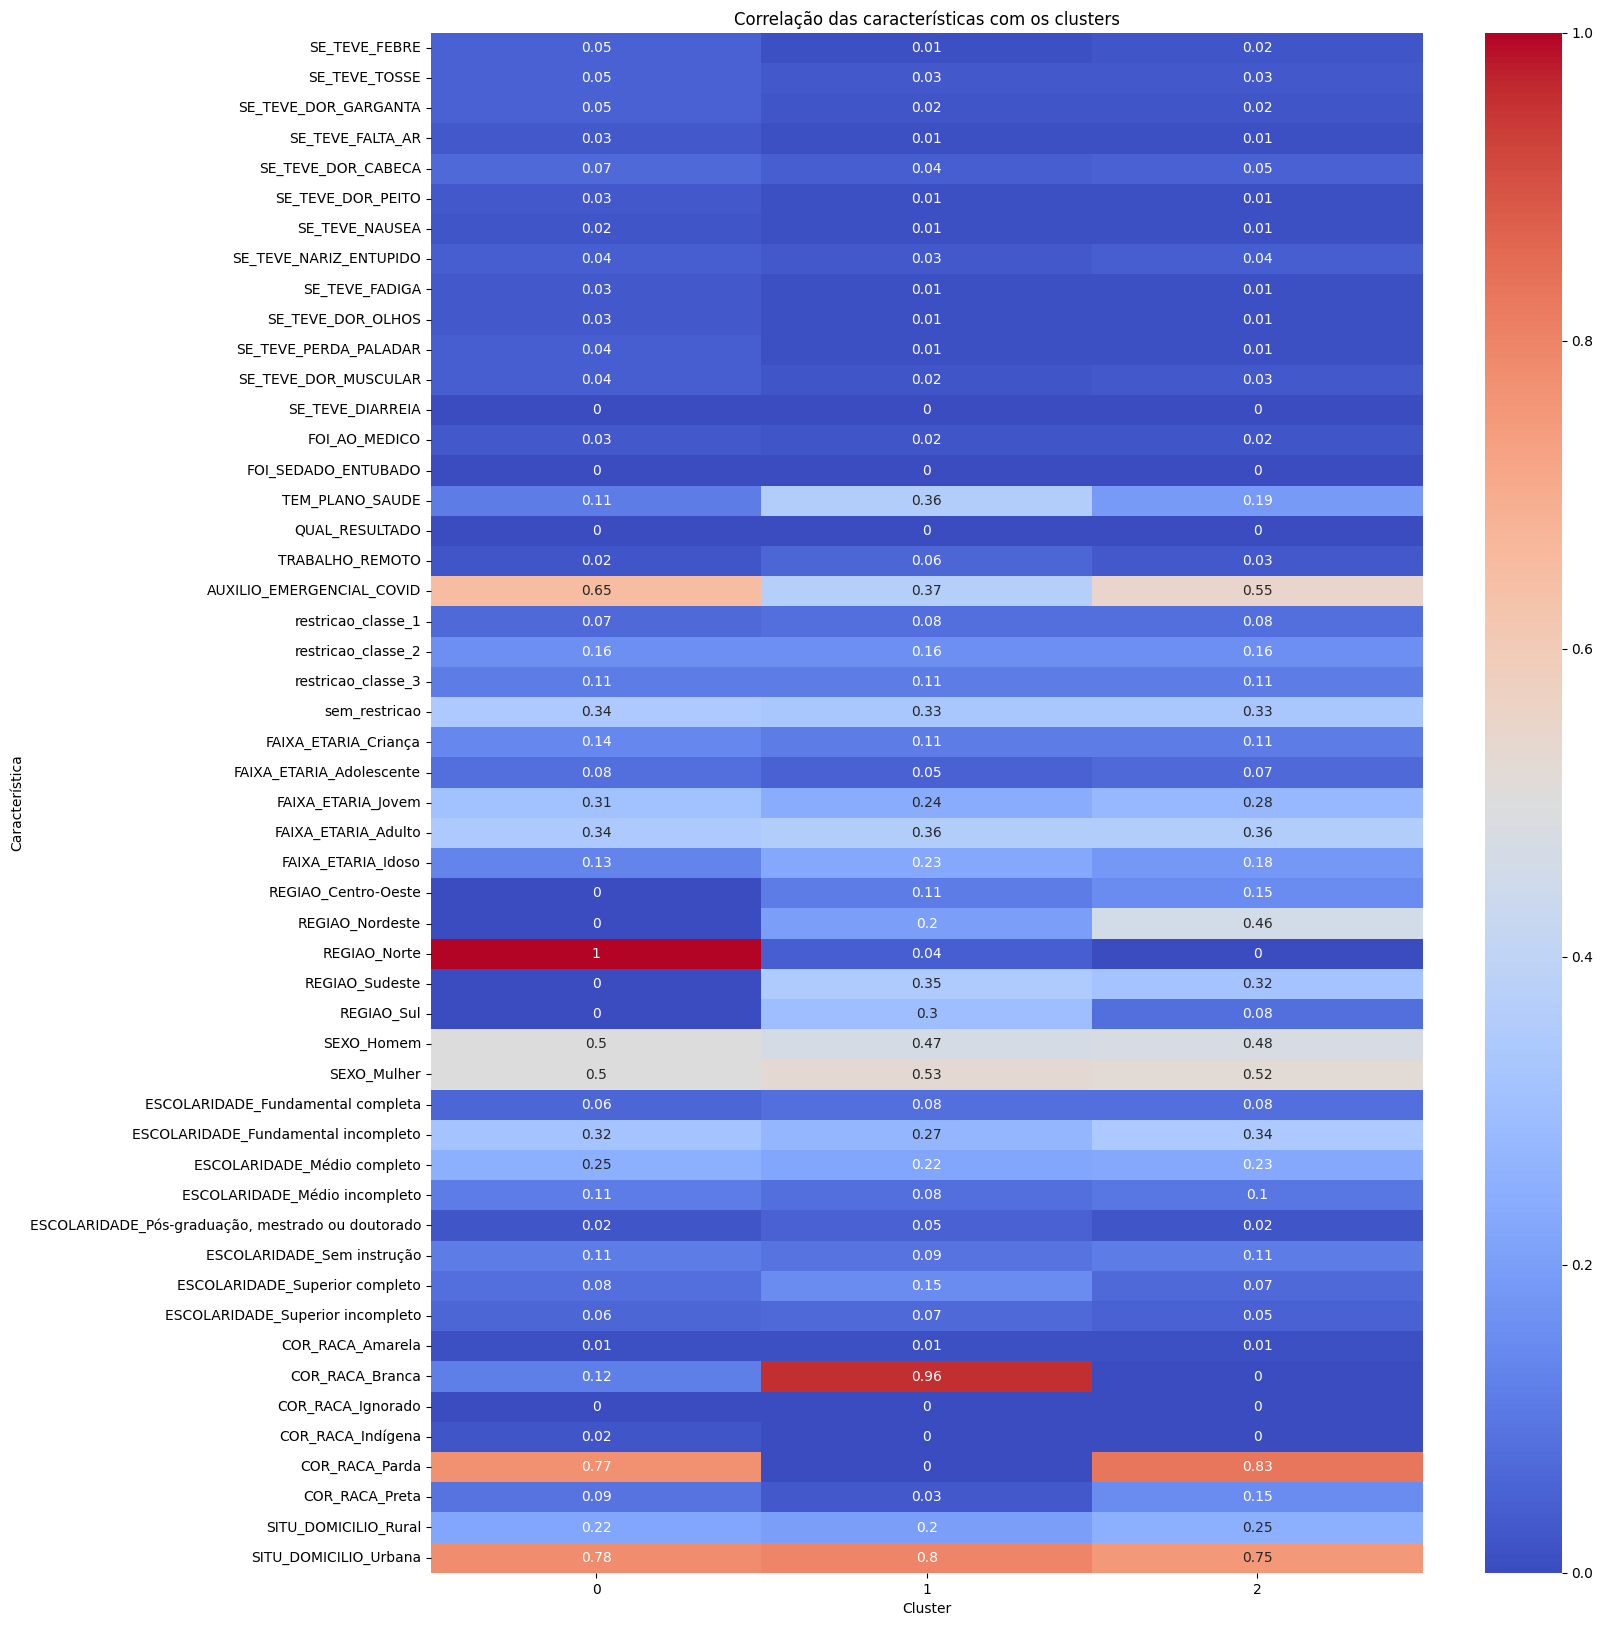

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular as médias das características para cada cluster
cluster_means = df_cluster.groupby('Cluster').mean().round(2)

# Transpor os dados para que as características sejam as linhas e os clusters sejam as colunas
cluster_means_transposed = cluster_means.T

# Plotar o heatmap
plt.figure(figsize=(16, 20))
sns.heatmap(cluster_means_transposed, annot=True, cmap='coolwarm')
plt.title('Correlação das características com os clusters')
plt.xlabel('Cluster')
plt.ylabel('Característica')
plt.show()

In [13]:
Valores únicos na coluna 'ANOMES':
[202007 202006 202005]

Valores únicos na coluna 'ANO_PESQUISA':
[2020]

Valores únicos na coluna 'MES_PESQUISA':
[7 6 5]

Valores únicos na coluna 'SEMANA_MES':
[3 2 4 1]

Valores únicos na coluna 'UF':
['Santa Catarina' 'Espírito Santo' 'Minas Gerais' 'Ceará' 'Rondônia'
 'Mato Grosso do Sul' 'Pernambuco' 'Pará' 'Maranhão' 'Alagoas' 'Amapá'
 'Tocantins' 'Rio de Janeiro' 'São Paulo' 'Paraná' 'Rio Grande do Sul'
 'Mato Grosso' 'Roraima' 'Rio Grande do Norte' 'Goiás' 'Paraíba'
 'Amazonas' 'Sergipe' 'Bahia' 'Acre' 'Piauí' 'Distrito Federal']

Valores únicos na coluna 'CAPITAL':
['Não Informado' 'Município de Natal (RN)' 'Município de Belém (PA)'
 'Município de Manaus (AM)' 'Município de Palmas (TO)'
 'Município de Recife (PE)' 'Município de Aracaju (SE)'
 'Município de Cuiabá (MT)' 'Município de Macapá (AP)'
 'Município de Maceió (AL)' 'Município de Curitiba (PR)'
 'Município de Goiânia (GO)' 'Município de Salvador (BA)'
 'Município de Teresina (PI)' 'Município de Vitória (ES)'
 'Município de Boa Vista (RR)' 'Município de Brasília (DF)'
 'Município de Fortaleza (CE)' 'Município de Rio Branco (AC)'
 'Município de São Luís (MA)' 'Município de São Paulo (SP)'
 'Município de Porto Velho (RO)' 'Município de Campo Grande (MS)'
 'Município de João Pessoa (PB)' 'Município de Porto Alegre (RS)'
 'Município de Belo Horizonte (MG)' 'Município de Florianópolis (SC)'
 'Município de Rio de Janeiro (RJ)']

Valores únicos na coluna 'REGIAO_METROPOLITANA':
['Não Informado' 'Região Metropolitana de Florianópolis (SC)'
 'Região Metropolitana de Grande Vitória (ES)'
 'Região Metropolitana de Belém (PA)'
 'Região Metropolitana de Grande SãoLuís (MA)'
 'Região Metropolitana de Macapá (AP)'
 'Região Metropolitana de São Paulo (SP)'
 'Região Metropolitana de Vale do Rio Cuiabá (MT)'
 'Região Metropolitana de Fortaleza (CE)'
 'Região Metropolitana de Rio de Janeiro (RJ)'
 'Região Metropolitana de Recife (PE)'
 'Região Metropolitana de João Pessoa (PB)'
 'Região Metropolitana de Manaus (AM)'
 'Região Metropolitana de Natal (RN)'
 'Região Metropolitana de Salvador (BA)'
 'Região Metropolitana de Porto Alegre (RS)'
 'Região Metropolitana de Curitiba (PR)'
 'Região Metropolitana de Belo Horizonte (MG)'
 'Região Metropolitana de Goiânia (GO)'
 'Região Metropolitana de Aracaju (SE)'
 'Região Metropolitana de Maceió (AL)'
 'Região Administrativa Integrada de Desenvolvimento da Grande Teresina (PI)']

Valores únicos na coluna 'SITU_DOMICILIO':
['Urbana' 'Rural']

Valores únicos na coluna 'TIPO_AREA':
['Resto da UF  (Unidade da Federação, excluindo a região metropolitana e a RIDE)'
 'Resto da RM (Região Metropolitana, excluindo a capital)'
 'Resto da RIDE (Região Integrada de Desenvolvimento Econômico, excluindo a capital)'
 'Capital']

Valores únicos na coluna 'IDADE_MORADOR':
[ 33  70  63  82  12  19  43   1  50  11  73  58  41  55   8  20   3   4
  59  18  21  45  60  23  14  38  71  54  46   6  65  52  13  56  27  29
  34  69  47  28  48  16  37  87  35  44  15  39  64  40  74  36  17  31
  72  25  88   5  76  68  89   0   7  24   2  10  32   9  53  49  57  81
  42  22  93  80  51  26  97  78  61  75  30  85  62  83  67  92  66  77
  79  91  84 100  86  95  90  96  94  98 105  99 103 101 102 104 106 107
 111 109 110 108]

Valores únicos na coluna 'SEXO':
['Homem' 'Mulher']

Valores únicos na coluna 'COR_RACA':
['Branca' 'Preta' 'Parda' 'Amarela' 'Indígena' 'Ignorado']

Valores únicos na coluna 'ESCOLARIDADE':
['Médio completo' 'Superior completo' 'Fundamental incompleto'
 'Médio incompleto' 'Sem instrução' 'Fundamental completa'
 'Superior incompleto' 'Pós-graduação, mestrado ou doutorado']

Valores únicos na coluna 'SE_TEVE_FEBRE':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_TOSSE':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_DOR_GARGANTA':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_FALTA_AR':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_DOR_CABECA':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_DOR_PEITO':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_NAUSEA':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_NARIZ_ENTUPIDO':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_FADIGA':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_DOR_OLHOS':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_PERDA_PALADAR':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_DOR_MUSCULAR':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'SE_TEVE_DIARREIA':
['Não ' 'Ignorado' 'Não sabe' 'Sim']

Valores únicos na coluna 'FOI_AO_MEDICO':
['Não aplicável' 'Não ' 'Sim' 'Ignorado']

Valores únicos na coluna 'FOI_SEDADO_ENTUBADO':
['Não aplicável' 'Não ' 'Sim' 'Ignorado']

Valores únicos na coluna 'TEM_PLANO_SAUDE':
['Não ' 'Ignorado' 'Sim']

Valores únicos na coluna 'QUAL_RESULTADO':
['Não aplicável' 'Negativo' 'Positivo' 'Ainda não recebeu o resultado'
 'Inconclusivo']

Valores únicos na coluna 'MEDIDA_RESTRICAO':
['Ignorado' 'Não aplicável' 'Ficou rigorosamente em casa'
 'Ficou em casa e só saiu em caso de necessidade básica'
 'Não fez restrição, levou vida normal como antes da pandemia'
 'Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas']

Valores únicos na coluna 'TRABALHO_REMOTO':
['Não aplicável' 'Sim' 'Não']

Valores únicos na coluna 'AUXILIO_EMERGENCIAL_COVID':
['Não' 'Sim']

Valores únicos na coluna 'REGIAO':
['Sul' 'Sudeste' 'Nordeste' 'Norte' 'Centro-Oeste']

Valores únicos na coluna 'FAIXA_ETARIA':
['Jovem', 'Idoso', 'Adolescente', 'Adulto', 'Criança']
Categories (5, object): ['Criança' < 'Adolescente' < 'Jovem' < 'Adulto' < 'Idoso']


SyntaxError: invalid syntax (3841709993.py, line 1)